# Ropes in a Basket problem

### Given 100 ropes in a basket. Each time you take randomly two ends and connect them together. How many loops do you expect at the end?


This problem has this nice recusive structure:

_At each step, given that you are holding an end in your right hand, you have a $\frac{1}{2n -1}$ chance of picking the other end of the same rope. If you do, that's one more loop! In any case, the problem remains the same except you only have to deal with $n-1$ ropes._

Let's denote by $num\_loops(n)$ the number of loops obtained using $n$ ropes.

We have:

$$ num\_loops(1) = 1 $$

and 

$$ num\_loops(n) = \begin{cases} 1 + num\_loops(n-1) &\mbox{with probability} \frac{1}{2n -1} \\
num\_loops(n-1) &\mbox{with probability} \frac{2n-3}{2n -1} \end{cases} $$

So the expected number of loops is:

$$E[num\_loops(n)] = \frac{1}{2n -1} + E[num\_loops(n-1)] = \frac{1}{2n -1} + \frac{1}{2(n-1) -1} E[num\_loops(n-2)] = \dots = \sum_{i = 1}^n \frac{1}{2i -1}$$

Which for 100 ropes is about 3.28 .


### Simulation

In [7]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
def num_loops(n):
    '''Simulate the ropes problem for a given number of rope n'''
    
    # only one rope, has to make a loop
    if n == 1:
        return 1
    
    # draw a random deviate from Unif[0, 1]
    u = random.uniform(0, 1)
    
    if u < (1 / (2*n - 1)):
        return 1 + num_loops(n-1)
    else:
        return num_loops(n-1)
    
    
# compute the exact average as
def exact_expected_val(n):
    return sum([1/(2*i - 1) for i in range(1, n+1)])

In [23]:
num_loops(100), exact_expected_val(100)

(3, 3.2843421893016322)

In [19]:
# simulate this 5000 times and plot histogram
simulations = [num_loops(100) for _ in range(5000)]

Simulated Average: 3.2882
Exact Average: 3.2843421893016322


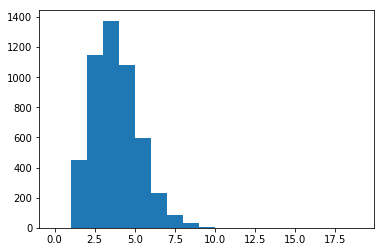

In [21]:
print(f"Simulated Average: {sum(simulations)/len(simulations)}\nExact Average: {exact_expected_val(100)}")
plt.hist(simulations, bins=[i for i in range(20)]);